In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Данные за май 2016

Загружаем данные за май в df05

In [210]:
df05 = pd.read_csv('yellow_tripdata_2016-05.csv')

Оставляем только поезки с длительностью больше 0 секунд

Оставляем только поездки с числом пассажиров больше 0

Оставляем только поездки с ненулевой дистанцией

Нью-Йорк вписан в прямоугольник от -74.25559 до -73.70001 градусов долготы и от 40.49612 до 40.91553 широты

Отбросим поездки, где координаты начала не попадают в прямоугольник Нью-Йорка

In [211]:
df05 = df05[(df05['trip_distance'] > 0) & 
          (df05['passenger_count'] > 0) &
          (df05['tpep_pickup_datetime'] != df05['tpep_dropoff_datetime']) &
          (df05['pickup_longitude'] > -74.25559) &
          (df05['pickup_longitude'] < -73.70001) &
          (df05['pickup_latitude'] > 40.49612) &
          (df05['pickup_latitude'] < 40.91553)]



In [19]:
df05.shape

(11626521, 20)

In [20]:
df05['group_pickup_datetime'] = map(lambda x: x.replace(second =0, minute = 0), df05.tpep_pickup_datetime)

In [21]:
df05 = df05.reset_index(drop = True)

In [94]:
regions = pd.read_csv('regions.csv', sep = ';')

In [214]:
from scipy import stats

In [215]:
def getRegion (longitude, latitude):
    binsX = np.linspace(-74.25559, -73.70001, 51)
    binsY = np.linspace(40.49612, 40.91553, 51)
    reg = stats.binned_statistic_2d(longitude, latitude, None, 
                                              statistic = "count", bins = [binsX, binsY], expand_binnumbers=True)
    return (reg.binnumber[0] - 1) * 50 + reg.binnumber[1]

df05['region'] = getRegion(df05.pickup_longitude, df05.pickup_latitude)

In [3]:
from tqdm import tqdm_notebook

import warnings
warnings.filterwarnings("ignore")

In [217]:
df05.to_csv('NY_taxi_may.csv')

In [216]:
df05.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2016-05-01 00:00:00   2016-05-01 00:17:31                1   
1         2  2016-05-01 00:00:00   2016-05-01 00:07:31                1   
2         2  2016-05-01 00:00:00   2016-05-01 00:07:01                6   
3         2  2016-05-01 00:00:00   2016-05-01 00:19:47                1   
4         2  2016-05-01 00:00:00   2016-05-01 00:06:39                1   

   trip_distance  pickup_longitude  pickup_latitude  RatecodeID  \
0           3.60        -73.985901        40.768040           1   
1           1.68        -73.991577        40.744751           1   
2           1.09        -73.993073        40.741573           1   
3           4.21        -73.991943        40.684601           1   
4           0.56        -74.005280        40.740192           1   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
0                  N         -73.983986         40.730099             1   
1                  N         -73.975700         40.765469             1   
2                  N         -73.980995         40.744633             1   
3                  N         -74.002258         40.733002             1   
4                  N         -73.997498         40.737564             1   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0         15.0    0.5      0.5        1.50           0.0   
1          7.5    0.5      0.5        0.88           0.0   
2          6.5    0.5      0.5        1.56           0.0   
3         17.0    0.5      0.5        3.66           0.0   
4          6.0    0.5      0.5        1.46           0.0   

   improvement_surcharge  total_amount  region  
0                    0.3         17.80    1233  
1                    0.3          9.68    1180  
2                    0.3          9.36    1180  
3                    0.3         21.96    1173  
4                    0.3          8.76    1130

In [120]:
group_count = df05[['group_pickup_datetime', 'region', 'VendorID']].groupby(['group_pickup_datetime', 'region']).count().reset_index()

#### Тут ниже в стоблце group_pickup_datetime время - не только дата, указан также час, но он почему-то не отборажается 

In [126]:
group_count.head()

group_pickup_datetime  region  VendorID
0   2016-05-01 00:00:00    1015         1
1   2016-05-01 00:00:00    1017         1
2   2016-05-01 00:00:00    1029         3
3   2016-05-01 00:00:00    1030         1
4   2016-05-01 00:00:00    1033         4

In [32]:
min(group_count.group_pickup_datetime)

Timestamp('2016-05-01 00:00:00')

In [33]:
max(group_count.group_pickup_datetime)

Timestamp('2016-05-31 23:00:00')

In [34]:
dt_range = pd.date_range(min(group_count.group_pickup_datetime), max(group_count.group_pickup_datetime), freq = '1H').tolist()

In [35]:
min(group_count.region)

15

In [36]:
max(group_count.region)

2487

In [63]:
import sys
print(sys.version)

2.7.14 |Anaconda, Inc.| (default, Dec  7 2017, 11:07:58) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [37]:
# na_count = 0

# for t in tqdm_notebook(dt_range):
#     if group_count[(group_count.group_pickup_datetime == t)].empty:
#         na_count+=2500
#         continue
#     for i in tqdm_notebook(range(1,2501)):
#          if group_count[(group_count.group_pickup_datetime == t) & (group_count.region == i)].empty:
#                 na_count+=1

Всего сочетаний час в течение месяца - регион города

In [38]:
len(dt_range)*2500

1860000

In [39]:
group_count[group_count.VendorID == 0]

Empty DataFrame
Columns: [group_pickup_datetime, region, VendorID]
Index: []

Всего пар образовалось при группировке

In [40]:
group_count.shape

(141762, 3)

Значит, нет записей по следующему колчиеству пар время (час) -регион

In [41]:
len(dt_range)*2500-group_count.shape[0]

1718238

Empire State Building, New York, NY, USA
Latitude and longitude coordinates are: 40.748817, -73.985428.

In [42]:
regions[(regions.west < -73.985428) & (regions.east>-73.985428) & (regions.north>40.748817) &(regions.south<40.748817)]

region       west     east      south      north
1230    1231 -73.988912 -73.9778  40.747766  40.756154

То есть нам нужен 1231 регион 

In [43]:
ESB = df05[df05.region == 1231]

In [44]:
ESB.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
5          2  2016-05-01 00:00:00   2016-05-01 00:05:19                2   
7          2  2016-05-01 00:00:00   2016-05-01 00:06:31                1   
27         1  2016-05-01 00:00:04   2016-05-01 00:19:16                1   
33         1  2016-05-01 00:00:05   2016-05-01 00:02:04                1   
50         2  2016-05-01 00:00:07   2016-05-01 00:22:42                1   

    trip_distance  pickup_longitude  pickup_latitude  RatecodeID  \
5            0.63        -73.979294        40.755764           1   
7            1.48        -73.987198        40.750507           1   
27           1.90        -73.987854        40.749043           1   
33           0.50        -73.988297        40.754631           1   
50           5.33        -73.983688        40.755520           1   

   store_and_fwd_flag  dropoff_longitude  ...    fare_amount  extra  mta_tax  \
5                   N         -73.988014  ...            5.0    0.5      0.5   
7                   N         -73.980797  ...            7.0    0.5      0.5   
27                  N         -73.992203  ...           13.0    0.5      0.5   
33                  N         -73.989418  ...            4.0    0.5      0.5   
50                  N         -73.940720  ...           19.5    0.5      0.5   

    tip_amount  tolls_amount  improvement_surcharge  total_amount  duration  \
5         0.00           0.0                    0.3          6.30  00:05:19   
7         1.66           0.0                    0.3          9.96  00:06:31   
27        2.85           0.0                    0.3         17.15  00:19:12   
33        0.00           0.0                    0.3          5.30  00:01:59   
50        4.16           0.0                    0.3         24.96  00:22:35   

    group_pickup_datetime region  
5              2016-05-01   1231  
7              2016-05-01   1231  
27             2016-05-01   1231  
33             2016-05-01   1231  
50             2016-05-01   1231  

[5 rows x 22 columns]

In [45]:
ESB = ESB.reset_index(drop = True)

In [46]:
ESB_count = group_count[group_count.region == 1231]

In [47]:
ESB_count.head()

group_pickup_datetime  region  VendorID
50    2016-05-01 00:00:00    1231       881
274   2016-05-01 01:00:00    1231       713
502   2016-05-01 02:00:00    1231       533
714   2016-05-01 03:00:00    1231       418
921   2016-05-01 04:00:00    1231       353

In [4]:
import seaborn as sns

Text(0.5,1,'Number of trips from EBS region in time')

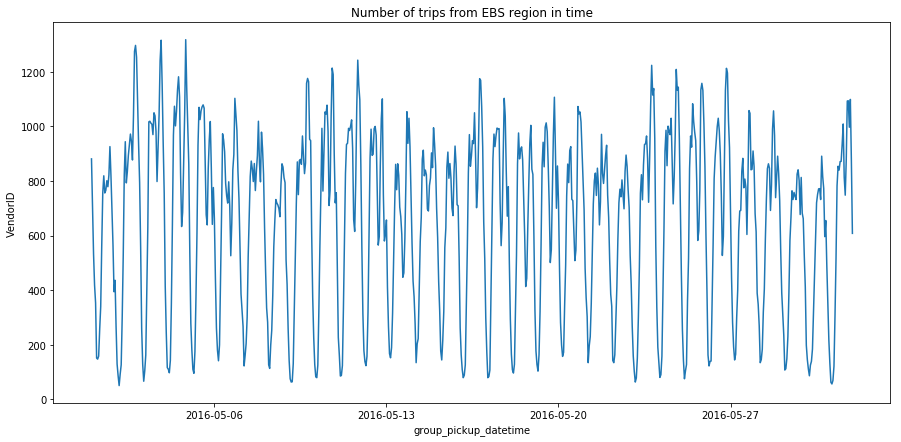

In [49]:
plt.figure(figsize=(15,7))

sns.lineplot(x = 'group_pickup_datetime', y = 'VendorID', data = ESB_count).set_title('Number of trips from EBS region in time')

По графику уже можно судить о явной сезонности наблюдений

# Вторая неделя

    1. Загрузите агрегированные данные о поездках в мае 2016. Просуммируйте общее количество поездок такси из каждой географической зоны и посчитайте количество ячеек, из которых в мае не было совершено ни одной поездки.


Агрегированные данные о поездках в мае 2016 хранятся в фрейме df05

In [23]:
df05 = pd.read_csv('NY_taxi_may.csv')

In [9]:
df05.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0           0         1  2016-05-01 00:00:00   2016-05-01 00:17:31   
1           1         2  2016-05-01 00:00:00   2016-05-01 00:07:31   
2           2         2  2016-05-01 00:00:00   2016-05-01 00:07:01   
3           3         2  2016-05-01 00:00:00   2016-05-01 00:19:47   
4           4         2  2016-05-01 00:00:00   2016-05-01 00:06:39   

   passenger_count  trip_distance  pickup_longitude  pickup_latitude  \
0                1              3               -73               40   
1                1              1               -73               40   
2                6              1               -73               40   
3                1              4               -73               40   
4                1              0               -74               40   

   RatecodeID store_and_fwd_flag   ...    fare_amount  extra  mta_tax  \
0           1                  N   ...             15      0        0   
1           1                  N   ...              7      0        0   
2           1                  N   ...              6      0        0   
3           1                  N   ...             17      0        0   
4           1                  N   ...              6      0        0   

   tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0           1             0                      0            17   
1           0             0                      0             9   
2           1             0                      0             9   
3           3             0                      0            21   
4           1             0                      0             8   

                    duration  group_pickup_datetime  region  
0  0 days 00:17:31.000000000    2016-05-01 00:00:00    1233  
1  0 days 00:07:31.000000000    2016-05-01 00:00:00    1180  
2  0 days 00:07:01.000000000    2016-05-01 00:00:00    1180  
3  0 days 00:19:47.000000000    2016-05-01 00:00:00    1173  
4  0 days 00:06:39.000000000    2016-05-01 00:00:00    1130  

[5 rows x 23 columns]

In [10]:
group_region = df05[['region', 'VendorID']].groupby('region').count().reset_index()

In [11]:
group_region.head()

region  VendorID
0      15         1
1      16         1
2      25         1
3      27         1
4      32        19

In [12]:
group_region.shape[0]

1217

In [54]:
regions.shape[0]

2500

Количество ячеек, из которых в мае не было совершено ни одной поездки

In [55]:
regions.shape[0] - group_region.shape[0]

1283

    2. Нарисуйте статическую карту Нью-Йорка. Поставьте на карте точку там, где находится Эмпайр-Стейт-Билдинг.

Empire State Building, New York, NY, USA
Latitude and longitude coordinates are: 40.748817, -73.985428.

Нью-Йорк вписан в прямоугольник от -74.25559 до -73.70001 градусов долготы и от 40.49612 до 40.91553 широты

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import cm

In [59]:
from itertools import chain

import folium

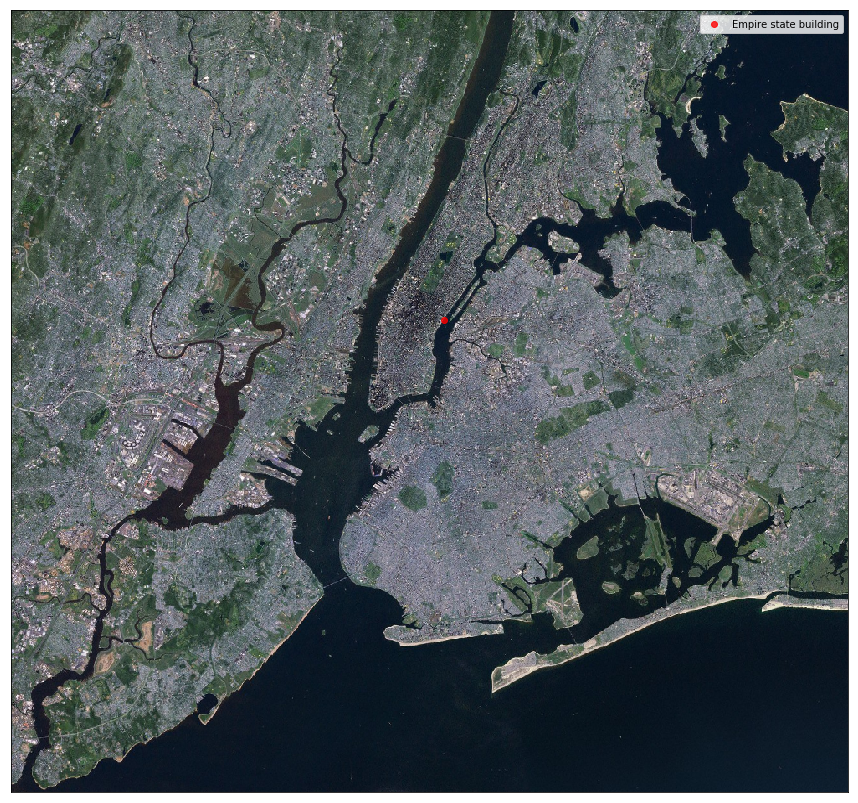

In [226]:
west, south, east, north = -74.25559, 40.49612,-73.70001, 40.91553

fig = plt.figure(figsize=(15,15))
m = Basemap(llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=east, urcrnrlon=west, epsg=2829)
m.arcgisimage(xpixels = 1000,ypixels = 1000)
m.scatter(-73.985656, 40.748433, latlon=True, c='red', alpha=0.8, label = 'Empire state building')
plt.legend()
plt.show() 


    3. Поверх статической карты Нью-Йорка визуализируйте данные о поездках из каждой ячейки так, чтобы цветовая шкала, в которую вы окрашиваете каждую ячейку, показывала суммарное количество поездок такси из неё.

In [234]:
from matplotlib.colors import  rgb2hex,Normalize, LogNorm

In [262]:
regions_range = np.arange(1, 2501)
all_regions = pd.DataFrame()
all_regions["region"] = regions_range
all_regions["counts"] = 0

region_notzero = df05["region"].value_counts()
region_notzero = (region_notzero).to_frame()
region_notzero.columns = ['counts']
region_notzero.index.name = 'region'
region_notzero = region_notzero.sort_values(by=['region'])
region_notzero.reset_index(level=0, inplace=True)

regions_all_data = pd.merge_asof(all_regions, region_notzero, on='region', by = ['region'])

regions_all_data = regions_all_data.fillna(0)
regions_all_data = regions_all_data.drop(["counts_x"], axis = 1)
regions_all_data = regions_all_data.rename(columns={'counts_y': 'counts'})

In [263]:
region_lon_length = (regions.iloc[0]["east"] - regions.iloc[0]["west"])/2
region_lat_length = (regions.iloc[0]["north"] - regions.iloc[0]["south"])/2
regions_all_data["lon_center"] = regions["west"] + region_lon_length
regions_all_data["lat_center"] = regions["south"] + region_lat_length
regions_all_data["average_per_hour"] = regions_all_data["counts"]/744

regions_all_data["south"] = regions["south"]
regions_all_data["north"] = regions["north"]
regions_all_data["west"] = regions["west"]
regions_all_data["east"] = regions["east"]

regions_all_data.head()

region  counts  lon_center  lat_center  average_per_hour      south  \
0       1     0.0  -74.250034   40.617749               0.0  40.613555   
1       2     0.0  -74.250034   40.626137               0.0  40.621943   
2       3     0.0  -74.250034   40.701631               0.0  40.697437   
3       4     0.0  -74.250034   40.718407               0.0  40.714213   
4       5     0.0  -74.250034   40.760348               0.0  40.756154   

       north      west       east  
0  40.621943 -74.25559 -74.244478  
1  40.630331 -74.25559 -74.244478  
2  40.705825 -74.25559 -74.244478  
3  40.722601 -74.25559 -74.244478  
4  40.764542 -74.25559 -74.244478

In [245]:
lon = sorted(list(set(regions.west) | set(regions.east))) #долгота
lat = sorted(list(set(regions.south) | set(regions.north))) #широта

In [254]:
# Таблица с центрами регионов
regions_center = pd.DataFrame(regions['region'])
regions_center['x'] = regions[['west','east']].mean(axis=1)
regions_center['y'] = regions[['north','south']].mean(axis=1)


In [258]:
df05.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2016-05-01 00:00:00   2016-05-01 00:17:31                1   
1         2  2016-05-01 00:00:00   2016-05-01 00:07:31                1   
2         2  2016-05-01 00:00:00   2016-05-01 00:07:01                6   
3         2  2016-05-01 00:00:00   2016-05-01 00:19:47                1   
4         2  2016-05-01 00:00:00   2016-05-01 00:06:39                1   

   trip_distance  pickup_longitude  pickup_latitude  RatecodeID  \
0           3.60        -73.985901        40.768040           1   
1           1.68        -73.991577        40.744751           1   
2           1.09        -73.993073        40.741573           1   
3           4.21        -73.991943        40.684601           1   
4           0.56        -74.005280        40.740192           1   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
0                  N         -73.983986         40.730099             1   
1                  N         -73.975700         40.765469             1   
2                  N         -73.980995         40.744633             1   
3                  N         -74.002258         40.733002             1   
4                  N         -73.997498         40.737564             1   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0         15.0    0.5      0.5        1.50           0.0   
1          7.5    0.5      0.5        0.88           0.0   
2          6.5    0.5      0.5        1.56           0.0   
3         17.0    0.5      0.5        3.66           0.0   
4          6.0    0.5      0.5        1.46           0.0   

   improvement_surcharge  total_amount  region  
0                    0.3         17.80    1233  
1                    0.3          9.68    1180  
2                    0.3          9.36    1180  
3                    0.3         21.96    1173  
4                    0.3          8.76    1130

In [259]:
regions.head()

region      west       east      south      north  mean_hour
0      15 -74.25559 -74.244478  40.613555  40.621943   0.001344
1      16 -74.25559 -74.244478  40.621943  40.630331   0.001344
2      25 -74.25559 -74.244478  40.697437  40.705825   0.001344
3      27 -74.25559 -74.244478  40.714213  40.722601   0.001344
4      32 -74.25559 -74.244478  40.756154  40.764542   0.025538

In [266]:
total = regions_all_data[['region','counts']].groupby(['region']).sum()
d = pd.merge(regions_center,total, left_on = ['region'], right_on = total.index.values, how='left')

In [267]:
d.head()

region          x          y  counts
0      15 -74.250034  40.617749     1.0
1      16 -74.250034  40.626137     1.0
2      25 -74.250034  40.701631     1.0
3      27 -74.250034  40.718407     1.0
4      32 -74.250034  40.760348    19.0

In [268]:
d_pivot = pd.pivot_table(d, values='counts', index=['y'],
                                 columns=['x'], aggfunc=np.sum, fill_value=0)
d_pivot.head()

x          -74.250034  -74.238923  -74.227811  -74.216699  -74.205588  \
y                                                                       
40.517090           0           0           0           0           0   
40.525479           0           0           0           0           0   
40.542255           0           0           0           0           0   
40.550643           0           0           0           0           0   
40.559032           0           0           0           0           0   

x          -74.194476  -74.183365  -74.172253  -74.161141  -74.150030  \
y                                                                       
40.517090           0           0           0           0           0   
40.525479           0           0           0           0           0   
40.542255           0           1           0           0           0   
40.550643           0           1           0           0           1   
40.559032           0           1           0           0           0   

x             ...      -73.805570  -73.794459  -73.783347  -73.772235  \
y             ...                                                       
40.517090     ...               0           0           0           0   
40.525479     ...               0           0           0           0   
40.542255     ...               0           0           0           0   
40.550643     ...               0           0           0           0   
40.559032     ...               0           0           0           0   

x          -73.761124  -73.750012  -73.738901  -73.727789  -73.716677  \
y                                                                       
40.517090           0           1           0           0           0   
40.525479           0           0           0           0           0   
40.542255           0           0           0           0           0   
40.550643           0           0           0           0           0   
40.559032           0           0           0           0           0   

x          -73.705566  
y                      
40.517090           0  
40.525479           0  
40.542255           0  
40.550643           0  
40.559032           0  

[5 rows x 50 columns]

ValueError: x and y arguments to pcolormesh cannot have non-finite values or be of type numpy.ma.core.MaskedArray with masked values

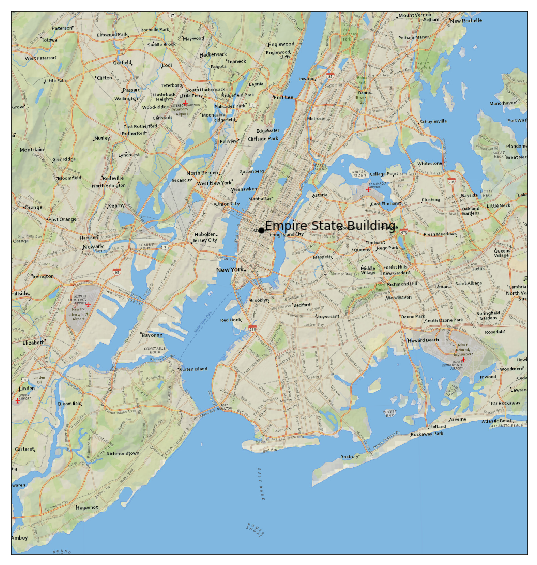

In [273]:
fig = plt.figure(figsize=(14,10))

m1 = Basemap(projection='merc', llcrnrlat=LatFrom, urcrnrlat=LatTo,
            llcrnrlon=LonFrom, urcrnrlon=LonTo, lat_ts=LatFrom, resolution='f', area_thresh = 0.1, epsg=2261)

m1.arcgisimage(service='NatGeo_World_Map', xpixels = 1000)

esb_lon, esb_lat = m1(-73.985477, 40.748364)
plt.plot(esb_lon, esb_lat, 'ok', markersize=5)
plt.text(esb_lon, esb_lat, ' Empire State Building', fontsize=12);


plt.pcolormesh(regions_all_data.lon_center.unique(), regions_all_data.lat_center.unique(),
                regions_all_data.counts.values.reshape(50,50).T,
                norm=LogNorm(vmin=1, vmax=np.max(regions_all_data.counts)),
                latlon=True, alpha=0.5, cmap='Reds')

plt.colorbar(orientation='vertical', shrink=0.85, label='Trips Count')
plt.show()  

TypeError: Dimensions of C (47, 50) are incompatible with X (51) and/or Y (49); see help(pcolormesh)

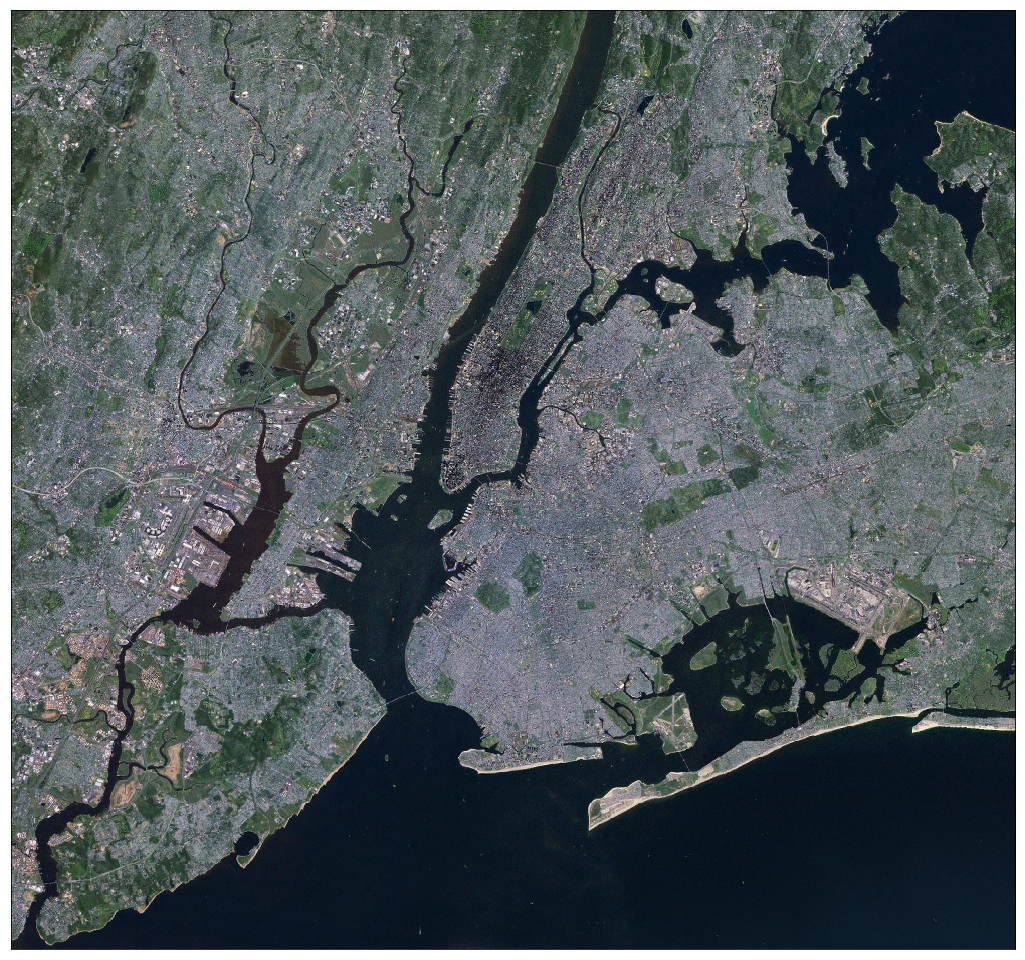

In [272]:
# Строим график с визуализацией сумм поездок из каждого региона
fig = plt.figure(figsize = (18,18))
m = Basemap(llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=east, urcrnrlon=west, epsg = 2829)
m.arcgisimage(xpixels = 1000,ypixels = 1000)
plt.pcolormesh(lon, 
             lat, 
             d_pivot,
             latlon = True,alpha = .5)
plt.colorbar(orientation = 'vertical', shrink = 0.8, pad = 0.05, extend = 'min', label = u'Количество поездок')
m.scatter(-73.985656, 40.748433, latlon = True, c = 'red', alpha = 0.8, label = u'Эмпайр-Стейт-Билдинг')
plt.legend()
plt.show()

In [241]:
LogNorm(vmin=1, vmax=np.max(regions_all_data.counts))

    4. Вставьте интерактивную карту Нью-Йорка — такую, которую можно прокручивать и увеличивать. Поставьте метку там, где находится статуя свободы.

40.689167,-74.044583

In [110]:
folium_map = folium.Map(location=[40.689167,-74.044583],
                        zoom_start=13,
                        tiles="cartodbpositron")
marker = folium.CircleMarker(location=[40.689167,-74.044583])
marker.add_to(folium_map)


In [111]:
folium_map

    5. Нарисуйте на интерактивной карте Нью-Йорка ячейки так, чтобы их цвет показывал среднее за месяц количество поездок такси в час из этой зоны.


In [91]:
from geojson import Polygon

In [147]:
from geojson import Feature

In [120]:
group_count = df05[['group_pickup_datetime', 'region', 'VendorID']].groupby(['group_pickup_datetime', 'region']).count().reset_index()

In [126]:
group_count.head()

group_pickup_datetime  region  VendorID
0   2016-05-01 00:00:00    1015         1
1   2016-05-01 00:00:00    1017         1
2   2016-05-01 00:00:00    1029         3
3   2016-05-01 00:00:00    1030         1
4   2016-05-01 00:00:00    1033         4

Всего часов в меясце 31*24

In [127]:
group_mean_hour = group_count[['region', 'VendorID']].groupby('region').sum().reset_index()

In [132]:
group_mean_hour['mean_hour'] = group_mean_hour.VendorID/np.float(31*24)

In [133]:
group_mean_hour.head()

region  VendorID  mean_hour
0      15         1   0.001344
1      16         1   0.001344
2      25         1   0.001344
3      27         1   0.001344
4      32        19   0.025538

In [196]:
# geos = []
# for i in range(regions.shape[0]):
#     poly = Feature( geometry = Polygon([[(regions.west[i], regions.south[i]), (regions.east[i], regions.south[i]),
#               (regions.east[i],   regions.north[i]), (regions.west[i], regions.north[i])]]), id = i) 
#     geos.append(poly)

# geometries = {
#     'type': 'FeatureCollection',
#     'features': geos,
# }

# geo_str = json.dumps(geometries)

In [203]:
# folium_map = folium.Map(location=[40.748817,  -73.985428],
#                         zoom_start=10,
#                         tiles="cartodbpositron")

# # folium.GeoJson(geo_str).add_to(folium_map)

# folium_map.choropleth(
#     geo_data=geo_str,
#     name='choropleth',
#     data=regions,
#     columns=['region', 'mean_hour'],
#     key_on='feature.id',
#     fill_color='YlGn',
#     fill_opacity=0.7,
#     line_opacity=0.2,
#     legend_name='Mean in an hour'
# )

# folium.LayerControl().add_to(folium_map)

In [204]:
# folium_map

    6. Чтобы не выбирать из всех 2500 ячеек вручную, отфильтруйте ячейки, из которых в мае совершается в среднем меньше 5 поездок в час. Посчитайте количество оставшихся. Проверьте на карте, что среди этих ячеек нет таких, из которых поездки на самом деле невозможны.


In [176]:
regions_best = regions[regions.mean_hour > 5]

In [179]:
regions_best = regions_best.reset_index()

In [180]:
regions_best.head()

index  region       west       east      south      north   mean_hour
0    344    1075 -74.022246 -74.011135  40.697437  40.705825   66.799731
1    345    1076 -74.022246 -74.011135  40.705825  40.714213  138.266129
2    346    1077 -74.022246 -74.011135  40.714213  40.722601   86.802419
3    379    1125 -74.011135 -74.000023  40.697437  40.705825   66.041667
4    380    1126 -74.011135 -74.000023  40.705825  40.714213  181.892473

In [207]:
geos = []
for i in range(regions_best.shape[0]):
    poly = Feature( geometry = Polygon([[(regions_best.west[i], regions_best.south[i]), (regions_best.east[i], regions_best.south[i]),
              (regions_best.east[i],   regions_best.north[i]), (regions_best.west[i], regions_best.north[i])]]), id = i) 
    geos.append(poly)

geometries = {
    'type': 'FeatureCollection',
    'features': geos,
}

geo_str = json.dumps(geometries)

In [208]:
folium_map = folium.Map(location=[40.748817,  -73.985428],
                        zoom_start=11,
                        tiles="cartodbpositron")

# folium.GeoJson(geo_str).add_to(folium_map)

folium_map.choropleth(
    geo_data=geo_str,
    name='choropleth',
    data=regions_best,
    columns=['region', 'mean_hour'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Mean in an hour'
)

folium.LayerControl().add_to(folium_map)

In [209]:
folium_map